Sample: 100%|██████████| 1500/1500 [00:51, 29.39it/s, step size=3.73e-01, acc. prob=0.883]


[5.6332936]
[12.743955]


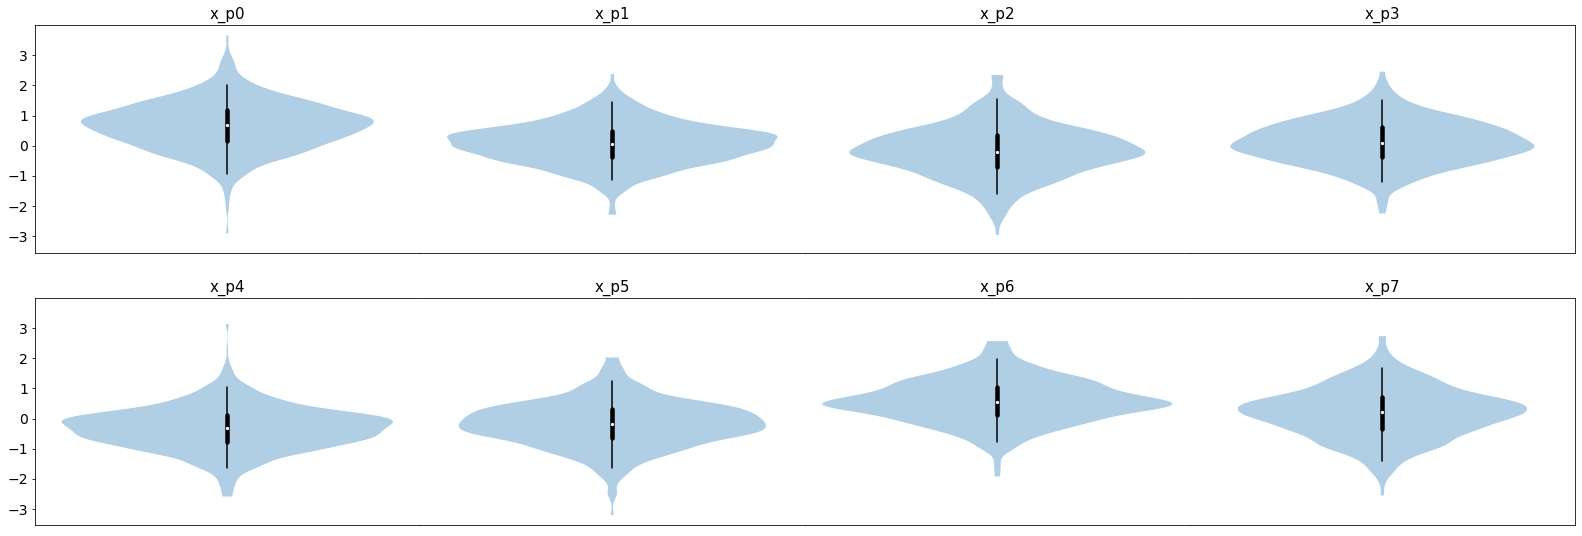

In [4]:
import torch as xp
from cuqi.distribution import JointDistribution
from cuqi.sampler import CWMH
from cuqipy_pytorch.distribution import Gaussian, LogGaussian
from cuqipy_pytorch.sampler import NUTS

xp.manual_seed(0) # Set random seed

# Observations
y_obs = xp.tensor([28, 8, -3,  7, -1, 1,  18, 12], dtype=xp.float32)
s_obs = xp.tensor([15, 10, 16, 11, 9, 11, 10, 18], dtype=xp.float32)

# Bayesian model
u     = Gaussian(0, 10**2)
t     = LogGaussian(5, 1)
x_p   = Gaussian(xp.zeros(8), 1)
x     = lambda u, t, x_p: u+t*x_p
y     = Gaussian(x, cov=s_obs**2)

# Posterior sampling
joint = JointDistribution(u, t, x_p, y)   # Define joint distribution 
posterior = joint(y=y_obs)               # Define posterior distribution
sampler = NUTS(posterior)                # Define sampling strategy
samples = sampler.sample(N=1000, Nb=500) # Sample from posterior

# Plot posterior samples
samples["x_p"].plot_violin(); 
print(samples["u"].mean()) # Average effect
print(samples["t"].mean()) # Average standard deviation